In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [43]:
data=pd.read_csv("/home/root1/Downloads/Food-Truck-LineReg(3).csv",header=None)
data.columns=['x','y']
data

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [44]:
def mean(list):
    total=0
    for i in range(0,len(list)):
        total+=list[i]
    return (total/len(list))

In [45]:
x= data['x']
y=data['y']
x

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: x, Length: 97, dtype: float64

In [46]:
x_val=data['x'].values
y_val=data['y'].values
#std_x=np.mean(x)
#std_y=np.mean(y)
x_mean=mean(x_val)
y_mean=mean(y_val)
print(x_mean,y_mean)

8.159800000000002 5.83913505154639


In [47]:
x2=0
y2=0
xy=0
x_val=data['x'].values

n = data['x'].count()
for i in range(n):
    x2=x2+(x[i]**2)
    y2=y2+(y[i]**2)
    xy=xy+(x[i]*y[i])
print(x2,y2,xy)    

7896.182453740001 6222.110372226397 6336.898425319003


In [48]:
def standard(list):
    n=mean(list)
    temp=0
    for i in list:
        temp=temp +((i-n)**2)
    sd=math.sqrt((temp/len(list)))
    return sd

In [49]:
r=(xy/((x2**(1/2))*(y2**(1/2))))
r
     

0.9040642647654091

In [50]:
std_x=standard(x_val)
std_y=standard(y_val)

m=(r*(std_y/std_x))
m

In [51]:
m=(r*(std_y/std_x))
m

1.2872819449340192

In [52]:
c=mean(y_val) - (m*mean(x_val))
c

-4.664828162726223

In [53]:
y_pred=[]
for i in range(n):
    y_pred.append((m*x[i])+c)
data['predicted']=y_pred
data

,x,y,predicted
0,6.1101,17.59200,3.200593
1,5.5277,9.13020,2.450880
2,8.5186,13.66200,6.301012
3,7.0032,11.85400,4.350265
4,5.8598,6.82330,2.878387
...,...,...,...
92,5.8707,7.20290,2.892418
93,5.3054,1.98690,2.164717
94,8.2934,0.14454,6.011116
95,13.3940,9.05510,12.577026


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


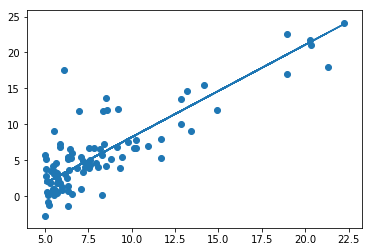

In [54]:
plt.plot(x,y_pred)
plt.scatter(x,y)

In [59]:
SST=0
SSR=0
SSE=0
MSE=0
for i in range(n):
    SST+=((y[i]-mean(y_val))**2)
    SSE+=((y[i]-y_pred[i])**2)
    SSR+=((y_pred[i]-mean(y_val))**2)
MSE=SST/n
cost=pow(MSE,(1/2))
R2=SSR/SST
print("SST:{}\n SSE:{}\n SSR:{} \nMSE:{}\n cost:{}\n R2: {}\n".format(SST,SSE,SSR,MSE,cost,R2))          
    

SST:2914.8470516572247
 SSE:881.3031285968032
 SSR:2382.3983383125683 
MSE:30.049969604713656
 cost:5.48178525707763
 R2: 0.8173321948258194

